<a href="https://colab.research.google.com/github/Harsh-Aggarwal-123/Covid-19-Data-Analysis/blob/main/Covid_19_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Covid19 Data Analysis Notebook
 Let's Import the modules

In [40]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


# Task 2
## Task 2.1: importing covid19 dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving covid_19_clean_complete.csv to covid_19_clean_complete.csv


In [3]:
dataset = pd.read_csv('covid_19_clean_complete.csv')

Let's check the shape of the dataframe

In [5]:
dataset.head()
dataset.shape

(49068, 10)

# Task 2.2:
 Delete the useless columns

In [7]:
dataset.drop(["Lat","Long"],axis=1,inplace=True)

In [8]:
dataset.head()

,Province/State,Country/Region,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,2020-01-22,0,0,0,0,Africa


# Task 2.3:
 Aggregating the rows by the country

In [9]:
dataset_agg=dataset.groupby("Country/Region").sum()

In [10]:
dataset_agg.head()

,Confirmed,Deaths,Recovered,Active
Country/Region,,,,
Afghanistan,1936390,49098,798240,1089052
Albania,196702,5708,118877,72117
Algeria,1179755,77972,755897,345886
Andorra,94404,5423,69074,19907
Angola,22662,1078,6573,15011


In [11]:
dataset_agg.shape

(187, 4)

## Task 2.4: Visualizing data related to a country for example China
visualization always helps for better understanding of our data.

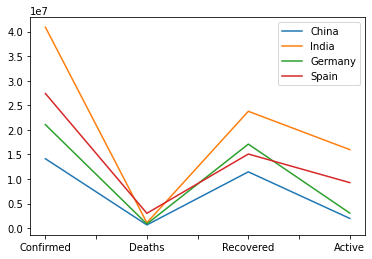

In [12]:
dataset_agg.loc["China"].plot()
dataset_agg.loc["India"].plot()
dataset_agg.loc["Germany"].plot()
dataset_agg.loc["Spain"].plot()
plt.legend()

## Task3: Calculating a good measure
we need to find a good measure reperestend as a number, describing the spread of the virus in a country.

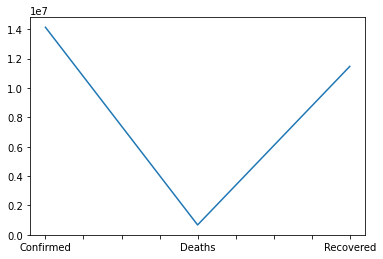

In [13]:
dataset_agg.loc['China'][:3].plot()

# task 3.1:
 caculating the first derivative of the curve

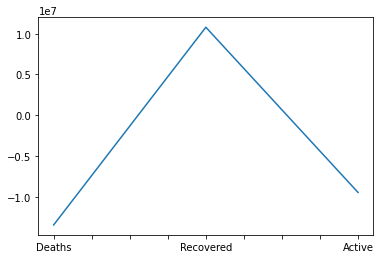

In [14]:
dataset_agg.loc["China"].diff().plot()

# task 3.2: 
find maxmimum infection rate for China

In [15]:
dataset_agg.loc["China"].diff().max()

10794453.0

In [16]:
dataset_agg.loc["India"].diff().max()

22671889.0

# Task 3.3:
 find maximum infection rate for all of the countries.

In [17]:
max_rate=[]
countries=list(dataset_agg.index) #making a list for countries, in index we have the name of the countries
for c in countries:
    max_rate.append(dataset_agg.loc[c].diff().max())
max_rate
#making a new column in the dataframe:
dataset_agg["max_infection_rate"]=max_rate

In [18]:
dataset_agg.head()

,Confirmed,Deaths,Recovered,Active,max_infection_rate
Country/Region,,,,,
Afghanistan,1936390,49098,798240,1089052,749142.0
Albania,196702,5708,118877,72117,113169.0
Algeria,1179755,77972,755897,345886,677925.0
Andorra,94404,5423,69074,19907,63651.0
Angola,22662,1078,6573,15011,8438.0


# Task 3.4
 create a new dataframe with only needed column

In [19]:
data=pd.DataFrame(dataset_agg["max_infection_rate"])

In [20]:
data.head(5)

,max_infection_rate
Country/Region,
Afghanistan,749142.0
Albania,113169.0
Algeria,677925.0
Andorra,63651.0
Angola,8438.0


# Task4:
Importing the WorldHappinessReport.csv dataset
selecting needed columns for our analysis
join the datasets
calculate the correlations as the result of our analysis
# Task 4.1 :
 importing the dataset

In [21]:
from google.colab import files
uploaded = files.upload()

Saving world_happiness.csv to world_happiness.csv


In [22]:
happiness=pd.read_csv("world_happiness.csv")

In [23]:
happiness.head()


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


# Task 4.2:
 let's drop the useless columns

In [24]:
useless=["Overall rank","Score","Generosity","Perceptions of corruption"]

In [25]:
happiness.drop(["Overall rank","Score","Generosity","Perceptions of corruption"],axis=1,inplace=True)
happiness.head(5)

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


# Task 4.3
 changing the indices of the dataframe

In [26]:
happiness.set_index("Country or region",inplace=True)

# Task4.4:
now let's join two dataset we have prepared
## Corona Dataset :

In [27]:
data.shape

(187, 1)

## wolrd happiness report Dataset :

In [28]:
happiness.shape

(156, 4)

In [29]:
final=data.join(happiness,how="inner")
final.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,749142.0,0.350,0.517,0.361,0.000
Albania,113169.0,0.947,0.848,0.874,0.383
Algeria,677925.0,1.002,1.160,0.785,0.086
Argentina,1582275.0,1.092,1.432,0.881,0.471
Armenia,830393.0,0.850,1.055,0.815,0.283


# Task 4.5:
## correlation matrix

In [30]:
final.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.233832,0.154694,0.193444,0.054155
GDP per capita,0.233832,1.000000,0.755163,0.860478,0.378606
Social support,0.154694,0.755163,1.000000,0.747574,0.451659
Healthy life expectancy,0.193444,0.860478,0.747574,1.000000,0.402267
Freedom to make life choices,0.054155,0.378606,0.451659,0.402267,1.000000


# Task 5: Visualization of the results
our Analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis

In [31]:
final.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,749142.0,0.350,0.517,0.361,0.000
Albania,113169.0,0.947,0.848,0.874,0.383
Algeria,677925.0,1.002,1.160,0.785,0.086
Argentina,1582275.0,1.092,1.432,0.881,0.471
Armenia,830393.0,0.850,1.055,0.815,0.283


# Task 5.1:  Plotting GDP vs maximum Infection rate

In [32]:
x=final["GDP per capita"]
y=final["max_infection_rate"]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


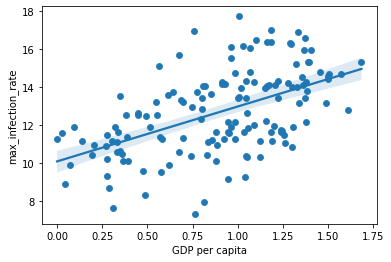

In [33]:
sns.scatterplot(x,np.log(y))
sns.regplot(x,np.log(y))

# Task 5.2: Plotting Social support vs maximum Infection rate

In [34]:
x1=final["Social support"]
y1=final["max_infection_rate"]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


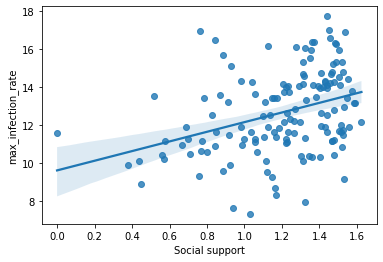

In [35]:
sns.regplot(x1,np.log(y1))

# Task 5.3: Plotting Healthy life expectancy vs maximum Infection rate

In [36]:
x2=final["Healthy life expectancy"]
y2=final["max_infection_rate"]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


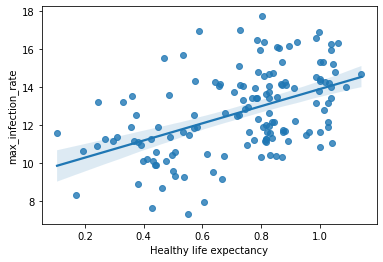

In [37]:
sns.regplot(x2,np.log(y2))

# Task 5.4: Plotting Freedom to make life choices vs maximum Infection rate

In [38]:
x3=final["Freedom to make life choices"]
y3=final["max_infection_rate"]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


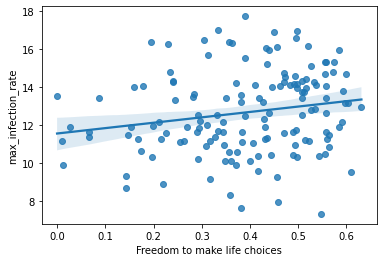

In [39]:
sns.regplot(x3,np.log(y3))